# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
#import openweathermapy.core as owm
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print("something")

something


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url="http://api.openweathermap.org/data/2.5/weather?"

In [4]:
# Create a settings object with your API key and preferred units
#settings = {"appid": api_key}

In [9]:
#setting up list and other varibales need for calculations
weather_data=[]
city_name=[]
city_number=[]
Cloudiness=[]
countries = []
Date = []
Humidity=[]
Lat=[]
Lng=[]
Max_temp=[]
Wind_speed=[]
count=0

In [10]:
for city in cities:  

    try:
            
        baseurl= f"{url}appid={api_key}&q={city}"
        #print(baseurl)
        city_weather=requests.get(baseurl).json()
        name = city_weather['name']
        number = city_weather['id']
        cloudiness = city_weather['clouds']['all']
        country = city_weather['sys']['country']
        date=city_weather['dt']
        humidity = city_weather['main']['humidity']
        lat = city_weather['coord']['lat']
        lon = city_weather['coord']['lon']
        mx_temp=city_weather['main']['temp_max']
        wind_speed=city_weather['wind']['speed']
        
        
       # print(f"{name} and {number}")
         
       
        weather_data.append(city_weather)
        city_name.append(name) 
        city_number.append(number)
        Cloudiness.append(cloudiness)
        countries.append(country)
        Date.append(date)
        Humidity.append(humidity)   
        Lat.append(lat)
        Lng.append(lon)
        Max_temp.append(mx_temp)
        Wind_speed.append(wind_speed)
        
                       
        count+=1
        if count==30:
            break
            
    except KeyError:
        print("NAN")
           
        #print(f"The weather of city number {str(weather_data['id'])} and city {weather_data['name']} is {weather_data}")
    #print(weather_data[3])
#print(Date)    
print("done")

NAN
NAN
NAN
[1558900040, 1558900041, 1558900028, 1558900041, 1558899497, 1558900041, 1558900041, 1558899907, 1558900042, 1558899489, 1558899441, 1558900042, 1558899497, 1558899921, 1558900043, 1558900043, 1558899905, 1558899505, 1558900008, 1558899492, 1558900044, 1558900044, 1558900044, 1558900044, 1558899908, 1558899901, 1558900045, 1558900045, 1558900046, 1558900046]
done


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
City_weather_df=pd.DataFrame({"City":city_name ,
                              "Number":city_number, 
                              "Cloudiness":Cloudiness,
                              "Country":countries,
                              "Date":Date,
                              "Humidity":Humidity,
                              "Lattitude": Lat,
                              "Longitude":Lng,
                              "Max Temp":Max_temp,
                              "Wind Speed":Wind_speed   
                                                       
                                                
                              })
                             # Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed
City_weather_df

,City,Number,Cloudiness,Country,Date,Humidity,Lattitude,Longitude,Max Temp,Wind Speed
0,Bela,1182998,0,PK,1558900040,15,26.23,66.31,306.129,2.28
1,Barrow,3833859,100,AR,1558900041,70,-38.31,-60.23,285.829,4.41
2,Mogadishu,53654,18,SO,1558900028,86,2.04,45.34,299.329,3.84
3,Namibe,3347019,0,AO,1558900041,71,-15.19,12.15,295.429,3.55
4,Te Anau,2181625,100,NZ,1558899497,98,-45.41,167.72,281.329,0.65
5,Georgiyevka,565857,63,RU,1558900041,96,52.25,40.45,285.229,2.55
6,Ler,3146125,75,NO,1558900041,61,63.20,10.30,281.480,5.70
7,Butaritari,2110227,36,KI,1558899907,78,3.07,172.79,302.329,6.93
8,Severo-Kurilsk,2121385,100,RU,1558900042,97,50.68,156.12,276.429,6.59
9,Ushuaia,3833367,40,AR,1558899489,65,-54.81,-68.31,278.150,4.10


In [ ]:

# Build the scatter plots for each city types

#plt.scatter(urban_df["Total Rides"],urban_df["Average Fare"], s=urban_df['Total Drivers']*10,
   #         marker ='o', facecolors ="coral", edgecolors='black',alpha = 0.5, label="Urban")"""

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

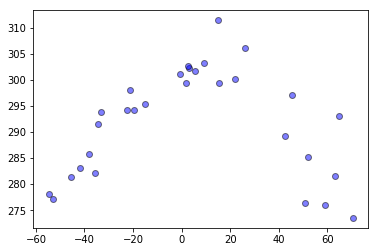

In [14]:
# Build the scatter plots 

plt.scatter(City_weather_df['Lattitude'],City_weather_df['Max Temp'],marker='o',facecolors ="Blue", edgecolors='black',alpha = 0.5, )

#### Latitude vs. Temperature Plot

In [ ]:
#

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot